# Lambdify, Solver, and Matrix

In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
init_printing()

## Lambdify

Function `evalf` are good for evaluating a mathematical function at a single point, but it is typically more convenient to turn the symbolic expression to reusable numerical function. Let me show you the inconvenience as follows,

In [2]:
var('x')
inputs = np.linspace(1,10,10)

f = x**2
f(1) # error, not callable
f(inputs) # even not possible

TypeError: 'Pow' object is not callable

To overcome this, `lamdify` takes in a symbolic variable (or list of variables) and an expression, then returns a callable function that corresponds to the expression.

In [3]:
var('x, y')
g = lambdify(x, x**2)
h = lambdify((x, y), x+y)
print(g(0), g(10), g(100)) # become callable
print(h(2, 3), h(0.1, 3.14)) # much more convenient

0 100 10000
5 3.24


`lambdify` has `module` input argument to define how the computation behaves. It maps the symbolic function in to numerical implementation. We can use either `sympy`, `numpy`, `math`, `numexpr`, or `mpmath`. If not specified differently by the user, SymPy functions are replaced as far as possible by either `python-math`, `numpy` (if available) or `mpmath` functions - exactly in this order. The choice also determine computational speed.

In [4]:
points = np.random.random(20000)
expr = sinh(x)

# Time using evalf() on each of the random points.
%time _ = [expr.subs(x, pt).evalf() for pt in points]

# Lambdify the expression and time using the resulting function.
f = lambdify(x, expr)
%time _ = [f(pt) for pt in points]

# Lambdify the expression and time using the default module order.
f = lambdify(x, expr)
%time _ = f(points)

# Lambdify the expression and time using only numpy module.
f = lambdify(x, expr, "numpy")
%time _ = f(points)

CPU times: user 9.52 s, sys: 3.54 ms, total: 9.53 s
Wall time: 9.53 s
CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 29.6 ms
CPU times: user 897 µs, sys: 9 µs, total: 906 µs
Wall time: 574 µs
CPU times: user 610 µs, sys: 0 ns, total: 610 µs
Wall time: 421 µs


## Solver and Matrix

A SymPy expression by itself is not an equation. However, `solve` equates an expression with zero and solves for a specified variable. In this way, SymPy can be used to solve equations.

In [5]:
expr = x**2 - 4
display(expr) # right-hand side is equated as zero
solve(expr,x)

We can also define both sides using `Eq` instead of assuming the right hand-side to be zero.

In [6]:
expr = Eq(x**2,4)
display(expr) # two sides equation
solve(expr,x)

Sometimes we also calculate systems of equation. For example a system of linear equation as following

$\begin{matrix}x &+& y &+& z &=& 5\\2x &+& 3y &+& 2z &=& 2\\7x &+& y &+& 6z &=& 12\end{matrix}$

We can rewrite in sympy and find the solutions.

In [7]:
var('x, y, z')
M = Matrix([
    [1, 1, 1, 5],
    [2, 3, 2, 2],
    [7, 1, 6, 12]
])
solve_linear_system(M, x, y, z)

SymPy matrices support the standard matrix operations of addition `+`, subtraction `-`, and multiplication `*`. Additionally, SymPy matrices are equipped with many useful methods, some of
which are listed below. See http://docs.sympy.org/latest/modules/matrices/matrices.html for more methods and examples.

|Method|Return|
|:-:|:-:|
|`det()`|The determinant.|
|`eigenvals()`|The eigenvalues and their multiplicities.|
|`eigenvects()`|The eigenvectors and their corresponding eigenvalues.|
|`inv()`|The matrix inverse.|
|`is_nilpotent()`|True if the matrix is nilpotent.|
|`norm()`|The Frobenius, ∞, 1, or 2 norm.|
|`nullspace()`|The nullspace as a list of vectors.|
|`rref()`|The reduced row-echelon form.|
|`singular_values()`|The singular values.|
|`T`|The transpose.|

In [8]:
# Example of matrix
A = Matrix([
    [1, 2],
    [3, 4]
])

display(A)
display(A.T)
display(A.norm())
display(A * A.inv())

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡a  c⎤
⎢    ⎥
⎣b  d⎦

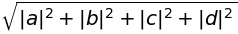

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

⎡   a⋅d         b⋅c                          ⎤
⎢───────── - ─────────            0          ⎥
⎢a⋅d - b⋅c   a⋅d - b⋅c                       ⎥
⎢                                            ⎥
⎢                          a⋅d         b⋅c   ⎥
⎢          0            ───────── - ─────────⎥
⎣                       a⋅d - b⋅c   a⋅d - b⋅c⎦

In [9]:
# Example of symbolic matrix
var('a, b, c, d')
B = Matrix([
    [a, b],
    [c, d]
])

latex(B)
display(B.T)
display(B.norm())
display(B.inv())
display(B * B.inv())

## Challenges

- Solve x for $\sqrt{x-8}=3$
- Solve x for $\left|2x-1\right|=5$
- Solve x for $e^x = 72$